In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/xAPI-Edu-Data.csv")

df.head()


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
df.shape


(480, 17)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [5]:
df.isnull().sum()


gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [6]:
df['Class'].value_counts()


Class
M    211
H    142
L    127
Name: count, dtype: int64

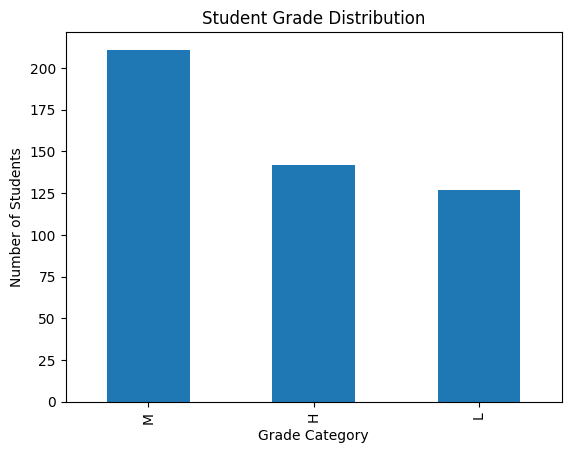

In [7]:
df['Class'].value_counts().plot(kind='bar')
plt.title("Student Grade Distribution")
plt.xlabel("Grade Category")
plt.ylabel("Number of Students")
plt.show()


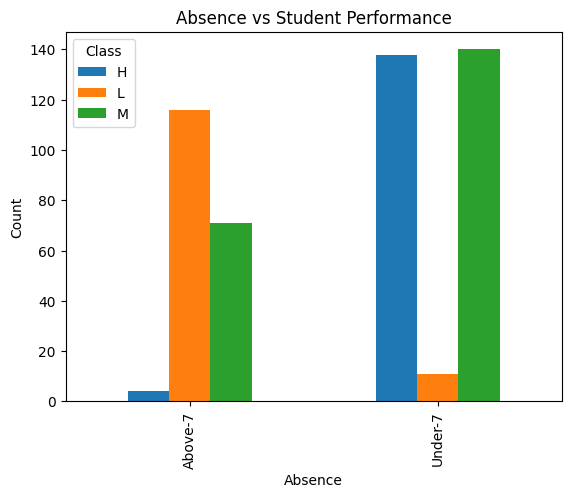

In [8]:
pd.crosstab(df['StudentAbsenceDays'], df['Class']).plot(kind='bar')
plt.title("Absence vs Student Performance")
plt.xlabel("Absence")
plt.ylabel("Count")
plt.show()


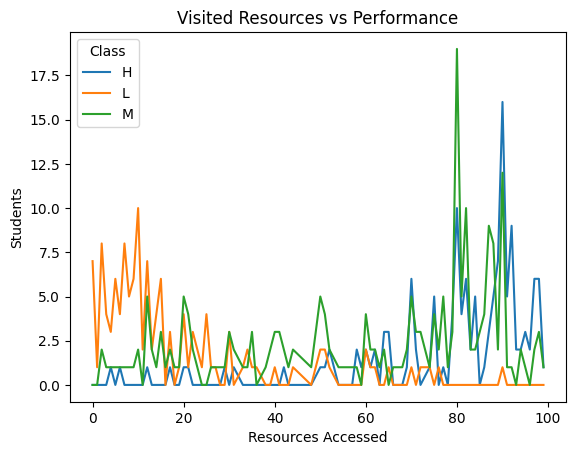

In [9]:
pd.crosstab(df['VisITedResources'], df['Class']).plot(kind='line')
plt.title("Visited Resources vs Performance")
plt.xlabel("Resources Accessed")
plt.ylabel("Students")
plt.show()


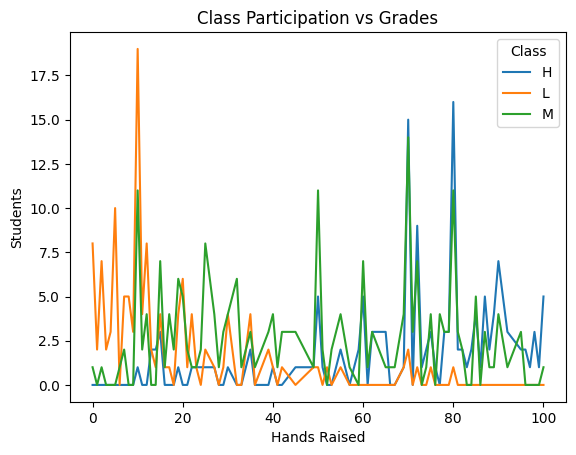

In [10]:
pd.crosstab(df['raisedhands'], df['Class']).plot(kind='line')
plt.title("Class Participation vs Grades")
plt.xlabel("Hands Raised")
plt.ylabel("Students")
plt.show()


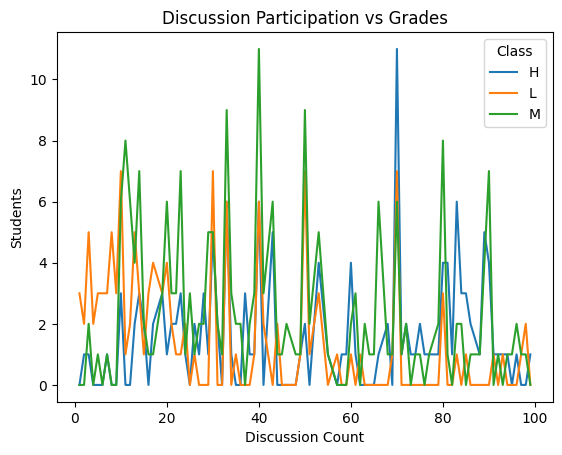

In [11]:
pd.crosstab(df['Discussion'], df['Class']).plot(kind='line')
plt.title("Discussion Participation vs Grades")
plt.xlabel("Discussion Count")
plt.ylabel("Students")
plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder

df_ml = df.copy()
le = LabelEncoder()

for col in df_ml.select_dtypes(include='object').columns:
    df_ml[col] = le.fit_transform(df_ml[col])


In [14]:
from sklearn.model_selection import train_test_split

X = df_ml.drop('Class', axis=1)
y = df_ml['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
model.score(X_test, y_test)


0.84375

In [17]:
import joblib
joblib.dump(model, "../model/student_performance_model.pkl")


['../model/student_performance_model.pkl']

In [7]:
import pandas as pd


In [8]:
df = pd.read_csv("../data/xAPI-Edu-Data.csv")

clean_df = df[['gender',
               'NationalITy',
               'PlaceofBirth',
               'raisedhands',
               'VisITedResources',
               'AnnouncementsView',
               'Discussion',
               'StudentAbsenceDays',
               'Class']]

clean_df.columns = ['gender','nationality','place_of_birth','raisedhands',
                    'visited_resources','announcements_view','discussion',
                    'student_absence_days','Grade']

clean_df.to_csv("../data/clean_students.csv", index=False)

clean_df.head()


,gender,nationality,place_of_birth,raisedhands,visited_resources,announcements_view,discussion,student_absence_days,Grade
0,M,KW,KuwaIT,15,16,2,20,Under-7,M
1,M,KW,KuwaIT,20,20,3,25,Under-7,M
2,M,KW,KuwaIT,10,7,0,30,Above-7,L
3,M,KW,KuwaIT,30,25,5,35,Above-7,L
4,M,KW,KuwaIT,40,50,12,50,Above-7,M


In [10]:
df = pd.read_csv("../data/xAPI-Edu-Data.csv")

clean_df = df[['gender',
               'NationalITy',
               'PlaceofBirth',
               'raisedhands',
               'VisITedResources',
               'AnnouncementsView',
               'Discussion',
               'StudentAbsenceDays',
               'Class']]

clean_df.columns = ['gender','nationality','place_of_birth','raisedhands',
                    'visited_resources','announcements_view','discussion',
                    'student_absence_days','Grade']

clean_df.to_csv("../data/clean_students.csv", index=False)

clean_df.head()


,gender,nationality,place_of_birth,raisedhands,visited_resources,announcements_view,discussion,student_absence_days,Grade
0,M,KW,KuwaIT,15,16,2,20,Under-7,M
1,M,KW,KuwaIT,20,20,3,25,Under-7,M
2,M,KW,KuwaIT,10,7,0,30,Above-7,L
3,M,KW,KuwaIT,30,25,5,35,Above-7,L
4,M,KW,KuwaIT,40,50,12,50,Above-7,M
